In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('signatures0227.txt', 
                 sep='   ', 
                 header=None,
                usecols=[1,2,3,4,5,6,7],
                engine='python')

X = df.values

In [3]:
df.head()

,1,2,3,4,5,6,7
0,2.258078,0.673287,0.256584,0.796049,4.595884,3.216975,0.170174
1,0.963668,0.288116,0.686709,0.891113,1.625685,10.510104,2.670437
2,1.068744,0.314521,0.679382,0.795126,1.564828,10.156915,2.181557
3,1.042409,0.324665,0.660663,0.889979,1.294276,8.895913,2.633087
4,1.781191,0.524947,0.392162,0.815378,3.623607,5.448313,0.179748


### Preparação dos dados

#### Normalizar

In [4]:
from scipy import stats

def normalize(x):
    x_normalized, _ = stats.boxcox(x)
    return x_normalized

df_normalized = df.apply(normalize)

X_normalized = df_normalized.values

In [5]:
df_normalized.head()

,1,2,3,4,5,6,7
0,1.097804,-0.446866,-0.861991,-0.176071,1.698130,1.507506,-1.223856
1,-0.036533,-1.855309,-0.328646,-0.100837,0.502647,4.008608,1.232949
2,0.068055,-1.674164,-0.336766,-0.176745,0.461946,3.917659,0.933151
3,0.042144,-1.610915,-0.357614,-0.101804,0.262612,3.577019,1.211177
4,0.711302,-0.787942,-0.677953,-0.161715,1.409339,2.469489,-1.198731


#### Padronizar

In [6]:
from sklearn.preprocessing import StandardScaler  # For scaling dataset

ss = StandardScaler()
X_scaled = ss.fit_transform(X_normalized)

(array([44., 26., 33., 68., 91., 66., 14.,  3.,  1.,  3.]),
 array([-2.00415257, -1.46697611, -0.92979965, -0.39262318,  0.14455328,
         0.68172975,  1.21890621,  1.75608267,  2.29325914,  2.8304356 ,
         3.36761207]),
 <a list of 10 Patch objects>)

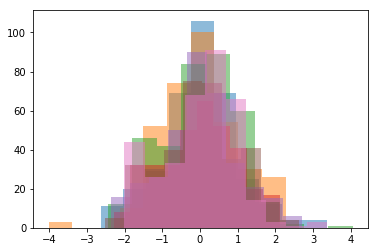

In [7]:
plt.hist(X_scaled.T[0], alpha=0.5)
plt.hist(X_scaled.T[1], alpha=0.5)
plt.hist(X_scaled.T[2], alpha=0.5)
plt.hist(X_scaled.T[3], alpha=0.5)
plt.hist(X_scaled.T[4], alpha=0.5)
plt.hist(X_scaled.T[5], alpha=0.5)
plt.hist(X_scaled.T[6], alpha=0.5)

#### Split de treino e teste

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, _, _ = train_test_split(X_scaled, X_scaled, test_size=0.33, random_state=42)

In [9]:
len(X_train)

233

In [10]:
len(X_test)

116

### Clustering

In [18]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=4, random_state=0, verbose=0).fit(X_scaled)

In [19]:
kmeans.labels_

array([0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 3, 0, 2, 2, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1,
       1, 3, 3, 3, 3, 1, 3, 1, 1, 0, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 3, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0,

In [20]:
kmeans.cluster_centers_

array([[ 0.13693228, -0.20693386,  0.2037708 ,  0.33114458, -0.19122718,
         0.18318005,  0.41409279],
       [ 0.64039539,  1.28674974, -1.21381151, -0.9182998 ,  0.91017163,
        -1.16397879, -1.49234834],
       [ 0.11787178, -1.26069405,  1.24264783, -0.76478772,  0.52246799,
         1.38605505,  0.43156101],
       [-1.55705305,  0.46340489, -0.53902966,  1.47513474, -1.54403481,
        -0.75581776,  0.39671075]])

In [21]:
dfc = pd.DataFrame(X_scaled)

#### Plot results

In [24]:
dfc['cluster'] = kmeans.labels_

In [25]:
dfc.head()

,0,1,2,3,4,5,6,cluster
0,0.406927,-0.507879,-0.231397,0.210365,1.556572,0.506412,-0.504655,0
1,-1.313495,-4.017164,2.212009,1.189031,-0.336844,2.641272,3.367612,2
2,-1.154869,-3.565823,2.174813,0.201604,-0.401306,2.563642,2.895089,2
3,-1.194167,-3.408230,2.079298,1.176454,-0.717013,2.272882,3.333297,2
4,-0.179271,-1.357706,0.611733,0.397114,1.099181,1.327530,-0.465054,2


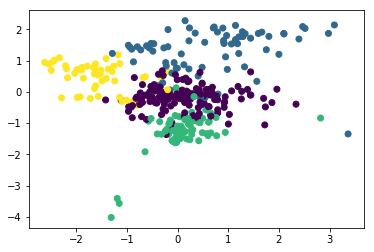

In [26]:
plt.scatter(dfc[0], dfc[1], c=dfc['cluster'])